## Merge metadata

notebook to merge metadata from https://github.com/soskek/bookcorpus and the smashwords text file corpus.

In [1]:
import glob
import pandas as pd

In [2]:
meta = './data/soskek-bookcorpus/url_list.jsonl'
meta = pd.read_json(meta, lines=True).set_index('b_idx')  # set index

# del some columns we don't need
del meta['page']
del meta['txt']

# extract filename from path and put into new column
meta['filename'] = meta.epub.str.split('/', expand=True)[10]

meta.head()

,epub,title,author,genres,publish,num_words,filename
b_idx,,,,,,,
1,https://www.smashwords.com/books/download/2465...,Silence,Natasha Preston,[\n Category: Ficti...,"Oct. 19, 2012",84880,silence.epub
2,https://www.smashwords.com/books/download/8869...,How to Be Free,Joe Blow,[\n Category: Nonfi...,"Sep. 13, 2011",24210,how-to-be-free.epub
3,https://www.smashwords.com/books/download/7123...,"The Pirate, Part I: The Traitor",Malcolm Torres,[\n Category: Ficti...,"March 18, 2017",21010,the-pirate-part-i-the-traitor.epub
4,https://www.smashwords.com/books/download/1194...,The New Girl,Tracie Puckett,[\n Category: Ficti...,"Jan. 2, 2012",21330,the-new-girl.epub
5,https://www.smashwords.com/books/download/6389...,Sharp Shooter,Marianne Delacourt,[\n Category: Ficti...,"May 25, 2016",76000,sharp-shooter.epub


In [3]:
# Get all the files which have been downloaded into a list
texts = !ls ./build/books1/epubtxt/

# Remove .txt file extensions
texts = [t[:-4] for t in texts]

texts[:5]

['1-2-this-is-only-the-beginning.epub',
 '1-god-poems-on-god-creator-volume-1.epub',
 '1-god-poems-on-god-creator-volume-2.epub',
 '1-god-poems-on-god-creator-volume-3.epub',
 '1-god-poems-on-god-creator-volume-4.epub']

Now we can join this file list into the dataframe, to join the metadata to the filesystem.

In [4]:
fn = pd.DataFrame(texts, columns=['filename'])

In [5]:
df = pd.merge(meta, fn, on=['filename'])
df

,epub,title,author,genres,publish,num_words,filename
0,https://www.smashwords.com/books/download/2465...,Silence,Natasha Preston,[\n Category: Ficti...,"Oct. 19, 2012",84880,silence.epub
1,https://www.smashwords.com/books/download/8869...,How to Be Free,Joe Blow,[\n Category: Nonfi...,"Sep. 13, 2011",24210,how-to-be-free.epub
2,https://www.smashwords.com/books/download/7123...,"The Pirate, Part I: The Traitor",Malcolm Torres,[\n Category: Ficti...,"March 18, 2017",21010,the-pirate-part-i-the-traitor.epub
3,https://www.smashwords.com/books/download/1194...,The New Girl,Tracie Puckett,[\n Category: Ficti...,"Jan. 2, 2012",21330,the-new-girl.epub
4,https://www.smashwords.com/books/download/6389...,Sharp Shooter,Marianne Delacourt,[\n Category: Ficti...,"May 25, 2016",76000,sharp-shooter.epub
...,...,...,...,...,...,...,...
14629,https://www.smashwords.com/books/download/5277...,Why The World Needs Heroes,Jonathan Aquino,[\n Category: Essay...,"March 15, 2015",26110,why-the-world-needs-heroes.epub
14630,https://www.smashwords.com/books/download/3518...,The unavoidable question of life: What After D...,D. HUBERT R. TATANG,[\n Category: Nonfi...,"Aug. 27, 2013",30820,the-unavoidable-question-of-life-what-after-de...
14631,https://www.smashwords.com/books/download/4488...,Hawk Banks - Founding Texas,D. Allen Henry,[\n Category: Ficti...,"June 16, 2014",119020,hawk-banks-founding-texas.epub
14632,https://www.smashwords.com/books/download/2911...,The Expats,Ivy D'Souza,[\n Category: Ficti...,"March 1, 2013",38040,the-expats.epub


In [67]:
fiction = df[df['genres'].astype(str).str.contains('Fiction')]
fiction = fiction[fiction['genres'].astype(str).str.contains('Science')]

In [68]:
import os
import shutil

outpath = './build/scifi/'
if not os.path.exists(outpath):
    os.mkdir(outpath)

# copy files into new dir
for f in fiction.filename:
    shutil.copy2('./build/books1/epubtxt/' + f + '.txt', outpath + f + '.txt')

# save metadata as csv
fiction.to_csv('./build/scifi.csv')

In [76]:
fiction['publish'] =  pd.to_datetime(fiction['publish'])

In [98]:
fiction.shape

(1720, 7)

<AxesSubplot:>

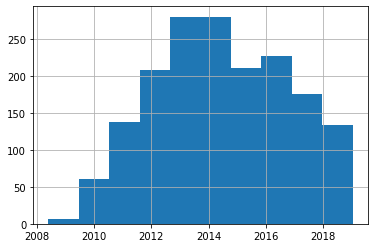

In [77]:
fiction.publish.hist()

<AxesSubplot:>

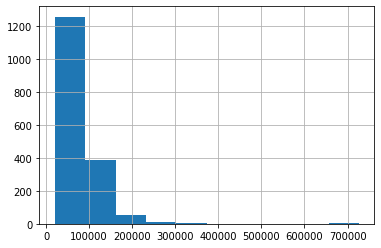

In [110]:
fiction.num_words.hist()

In [109]:
fiction.num_words.mean()

72348.96511627907

Great, so now we have a corpus with 1720 books written between 2010-2019, with average length of 72k words.

In [85]:
fiction.author.value_counts()

Philip Bosshardt       32
Beth Hoyer             23
Odette C. Bell         16
Philip R Benge         13
Hylton Smith           12
                       ..
Dan Knight              1
Delphine Dryden         1
Walter Jon Williams     1
Patrick Arnesen         1
Sam T Willis            1
Name: author, Length: 1174, dtype: int64

In [97]:
fiction.genres.value_counts()

[\n                            Category: Fiction » Science fiction » General ]                                                                                                      156
[\n                            Category: Fiction » Science fiction » Adventure ]                                                                                                    155
[\n                            Category: Fiction » Science fiction » Space opera ]                                                                                                   81
[\n                            Category: Fiction » Science fiction » Short stories ]                                                                                                 44
[\n                            Category: Fiction » Science fiction » General , \n                            Category: Fiction » Science fiction » Adventure ]                       39
                                                                                